# Спектральная Кластеризация (Spectral Clustering)


**Определение.** Спектральная кластеризация — это метод анализа данных, который использует техники линейной алгебры и теории графов для разделения набора данных на кластеры.

**Основная идея.** Идея заключается в том, что в собственных числах и векторах матрицы Лапласа уже содержится информация о разбиении данных на кластеры.

**Алгоритм:**
- Построить граф сходства
- Определить матрицу смежности W, матрицу степени D и матрицу Лапласа L
- Вычислить собственные векторы матрицы L
- Используя второй наименьший собственный вектор в качестве входных данных, обучите модель k-средних и используйте ее для классификации данных.

**Замечание!** *Получив матрицу Лапласа, мы можем воспользоваться одним из ее специальных свойств для классификации наших данных:*
**Если граф (W) имеет K компонент связности, то L имеет K собственных векторов с собственным значением 0.**

# Реализация на синтетических наборах данных.
**Пример 1.**


In [ ]:
# Импортим необходимые библиотеки :3
import numpy as np
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
sns.set()

Создадим граф с одной компонентой связности.

[[0 0 1 1 1 0 0 1 0 1]
 [0 0 1 0 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 1 0]
 [1 0 1 0 0 0 0 1 0 0]
 [1 0 0 0 0 1 0 0 0 1]
 [0 0 0 0 1 0 1 1 1 0]
 [0 0 0 0 0 1 0 1 0 0]
 [1 0 0 1 0 1 1 0 1 1]
 [0 0 1 0 0 1 0 1 0 1]
 [1 0 0 0 1 0 0 1 1 0]]


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


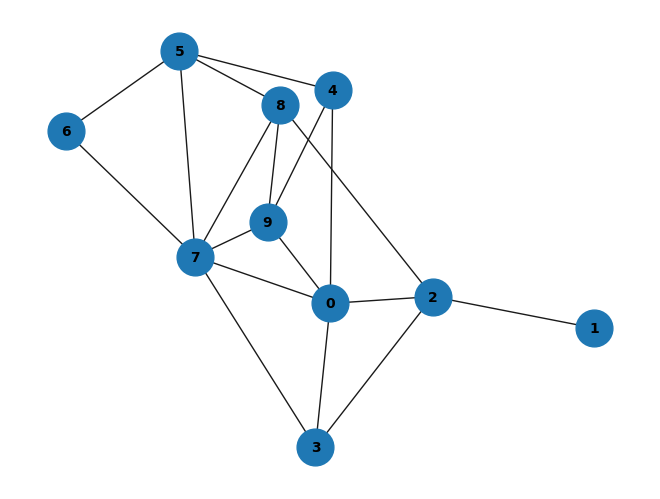

In [ ]:
G = nx.random_graphs.erdos_renyi_graph(10, 0.5) # Cоздаем случайный граф с 10 вершинами
pos = nx.spring_layout(G)
W = nx.adjacency_matrix(G)  # Создаем матрицу смежности для G

print(W.todense())
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, cmap=plt.cm.rainbow, font_color='black', font_size=10)
plt.show()

Теперь создадим матрицу степеней. Для каждой строки матрицы степени мы заполняем ячейку вдоль диагонали, суммируя все элементы соответствующей строки в матрице смежности, а затем мы получим матрицу Лапласа, вычитая матрицу смежности из матрицы степеней.

In [ ]:
D = np.diag(np.sum(np.array(W.todense()), axis=1))
print('Degree matrix:\n', D)
L = D - W
print('\nLaplacian matrix:\n', L)

Degree matrix:
 [[5 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 6 0 0]
 [0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 4]]

Laplacian matrix:
 [[ 5  0 -1 -1 -1  0  0 -1  0 -1]
 [ 0  1 -1  0  0  0  0  0  0  0]
 [-1 -1  4 -1  0  0  0  0 -1  0]
 [-1  0 -1  3  0  0  0 -1  0  0]
 [-1  0  0  0  3 -1  0  0  0 -1]
 [ 0  0  0  0 -1  4 -1 -1 -1  0]
 [ 0  0  0  0  0 -1  2 -1  0  0]
 [-1  0  0 -1  0 -1 -1  6 -1 -1]
 [ 0  0 -1  0  0 -1  0 -1  4 -1]
 [-1  0  0  0 -1  0  0 -1 -1  4]]


Найдем собственные числа и собственные векторы матрицы Лапласа.

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(L)
print('eigenvalues:\n', eigenvalues, '\neigenvectors:\n', eigenvectors)

eigenvalues:
 [7.42858287e+00 1.47104551e-15 6.35155187e+00 5.70944924e+00
 7.38107388e-01 1.67941135e+00 4.54813428e+00 4.02600371e+00
 3.20001920e+00 2.31874009e+00] 
eigenvectors:
 [[ 0.38573623  0.31622777  0.45312084  0.59796863  0.05375093  0.27136159
   0.15873896  0.20403163 -0.20437494  0.05657052]
 [ 0.03569878  0.31622777  0.06618739 -0.01815449 -0.86082307 -0.25449121
  -0.20207749  0.05303234 -0.07286752 -0.19818098]
 [-0.22949256  0.31622777 -0.35420523  0.08549767 -0.2254432   0.17290421
   0.71699806 -0.16047606  0.16030994  0.26134921]
 [ 0.14653035  0.31622777 -0.10387419 -0.3342943  -0.01192495  0.31832308
  -0.380814   -0.15726252 -0.30216648  0.62726323]
 [-0.15128634  0.31622777  0.12640893 -0.35421599  0.18004942  0.20870629
   0.18676862 -0.2428822  -0.48455597 -0.57534284]
 [ 0.18162625  0.31622777 -0.34681698  0.40526453  0.21182143 -0.22078503
  -0.2828437  -0.59638407  0.14725799 -0.17752963]
 [ 0.11486224  0.31622777  0.02242714 -0.1691765   0.28254445 -0.7

Итак, мы нашли собственные числа и собственные векторы матрицы Лапласа. Заметим, что одно из собственных чисел равно 0. По замечанию, сформулированному выше, можем сделать вывод, что у данного графа лишь одна компонента связности. Далее по нашему алгоритму необходимо выбрать второй наименьший собственный вектор (по второму наименьшему собственному числу).

[1 4 5]


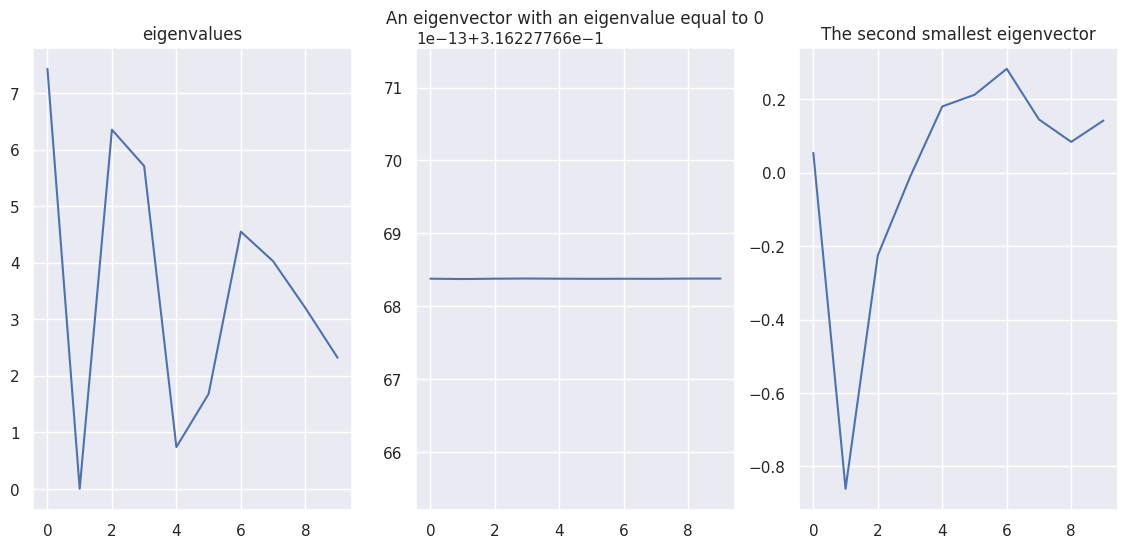

In [ ]:
fig = plt.figure(figsize=[14, 6])

ax1 = plt.subplot(131)
plt.plot(eigenvalues)
ax1.title.set_text('eigenvalues')

i = np.where(eigenvalues < 2)[0] # Индексы наименьших собственных векторов
print(i)

ax2 = plt.subplot(132)
plt.plot(eigenvectors[:, i[0]])
ax2.title.set_text('An eigenvector with an eigenvalue equal to 0')

ax3 = plt.subplot(133)
plt.plot(eigenvectors[:, i[1]])
ax3.title.set_text('The second smallest eigenvector')

Из графиков видно, что второй наименьший собственный вектор не может полноценно разделить наши данные на кластеры, а так как у нас всего одна компонента связности, то и кластер скорее всего один. Проверим наше результат с помощью kMeans и его обучения на базе второго наименьшего собственного вектора.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


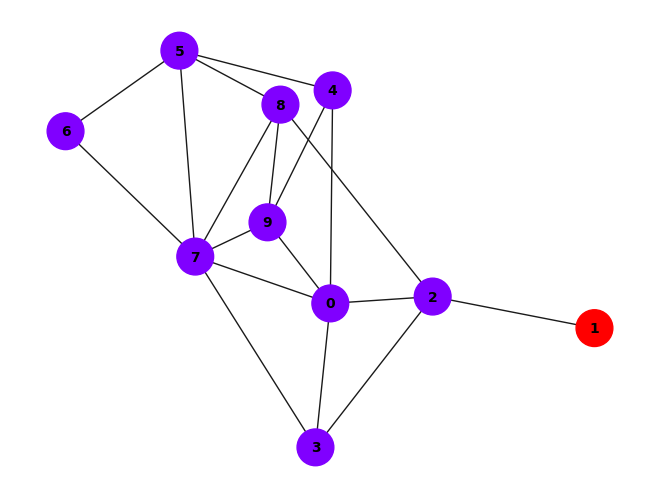

In [ ]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(eigenvectors[:, i[1]].reshape(-1, 1))

labels = kmeans.labels_

colors = [labels[i] for i in range(len(G.nodes))]
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color=colors, cmap=plt.cm.rainbow, font_color='black', font_size=10)
plt.show()

Итак, метод k средних показывает нам один кластер, что и требовалось доказать.


**Пример 2.**

Теперь создадим граф с двумя компонентами связности.

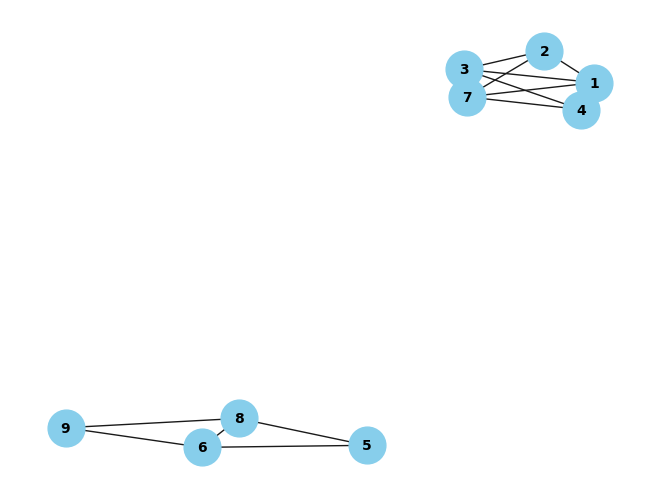

[[0 1 1 1 1 0 0 0 0]
 [1 0 1 0 1 0 0 0 0]
 [1 1 0 1 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0]
 [1 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 1 1 0 1]
 [0 0 0 0 0 1 0 1 0]]


In [ ]:
G = nx.Graph()
G.add_edges_from([
    [1, 2],
    [1, 3],
    [1, 4],
    [2, 3],
    [2, 7],
    [3, 4],
    [4, 7],
    [1, 7],
    [6, 5],
    [5, 8],
    [6, 8],
    [9, 8],
    [9, 6]])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10)
plt.show()

W = nx.adjacency_matrix(G) # Создаем матрицу смежности
print(W.todense())

Найдем собственные числа и собственные векторы матрицы Лапласа.

In [ ]:
D = np.diag(np.sum(np.array(W.todense()), axis=1))
L = D - W

eigenvalues, eigenvectors = np.linalg.eig(L)
print('eigenvalues:\n', eigenvalues, '\neigenvectors:\n', eigenvectors)

eigenvalues:
 [5.00000000e+00 0.00000000e+00 5.00000000e+00 3.00000000e+00
 3.00000000e+00 4.00000000e+00 1.11022302e-16 4.00000000e+00
 2.00000000e+00] 
eigenvectors:
 [[ 8.94427191e-01 -4.47213595e-01  7.74853679e-02  1.39563774e-16
   7.74160529e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-2.23606798e-01 -4.47213595e-01  4.78748880e-01  7.07106781e-01
   3.92232270e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-2.23606798e-01 -4.47213595e-01 -5.17491564e-01 -5.65133691e-16
  -5.88348405e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-2.23606798e-01 -4.47213595e-01  4.78748880e-01 -7.07106781e-01
  -3.92232270e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-2.23606798e-01 -4.47213595e-01 -5.17491564e-01  2.93655057e-16
   5.88348405e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000

Заметим, что 2 собственных числа равны 0. В данном случае скорее всего должны выделиться 2 кластера. Также заметим, что первые 5 узлов отображаются на одно и то же значение, а остальные 5 узлов отображаются на другое значение. Мы можем использовать этот факт для размещения узлов в одной из двух категорий.

[1 6]


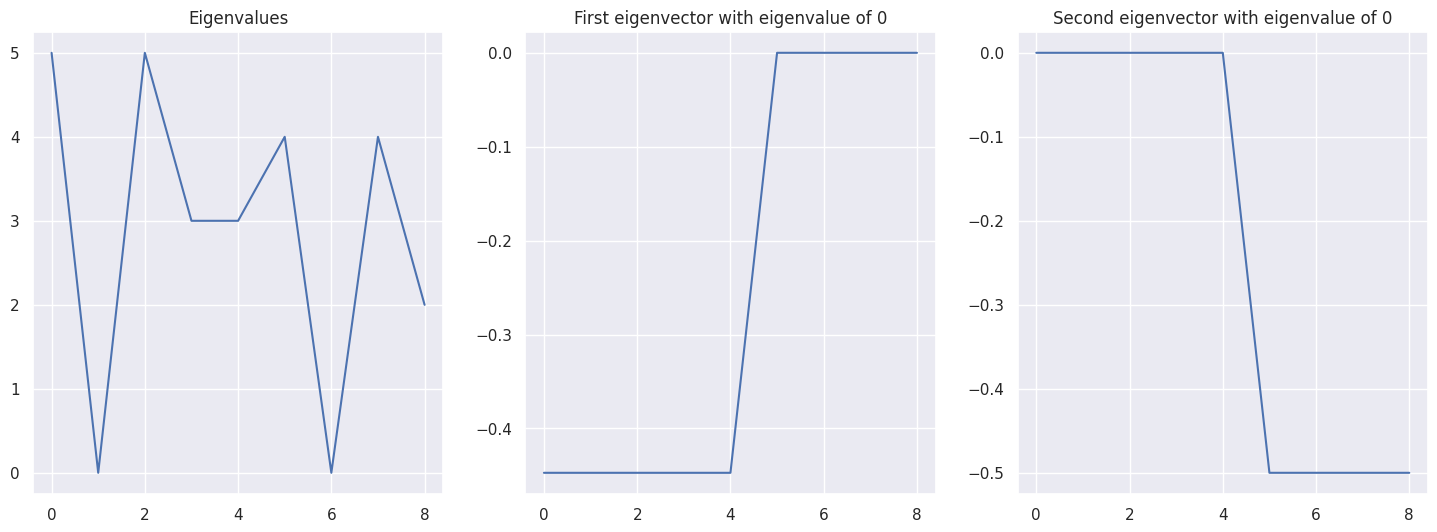

In [ ]:
fig = plt.figure(figsize=[18, 6])

ax1 = plt.subplot(131)
plt.plot(eigenvalues)
ax1.title.set_text('Eigenvalues')

i = np.where(eigenvalues < 10e-6)[0]
print(i)

ax2 = plt.subplot(132)
plt.plot(eigenvectors[:, i[0]])
ax2.title.set_text('First eigenvector with eigenvalue of 0')

ax3 = plt.subplot(133)
plt.plot(eigenvectors[:, i[1]])
ax3.title.set_text('Second eigenvector with eigenvalue of 0')

На графике видно, что эти два собственных вектора принадлежат двум разным кластерам и способствуют разделению на два кластера. Проверим с помощью k средних.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


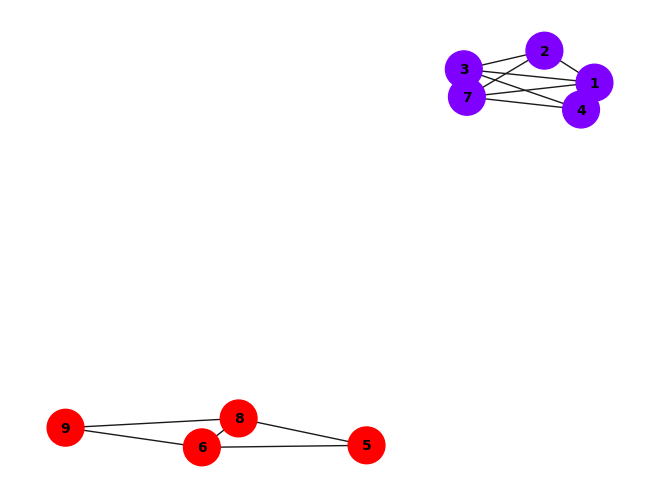

In [ ]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(eigenvectors[:, i[1]].reshape(-1, 1))

labels = kmeans.labels_

colors = [labels[i] for i in range(len(G.nodes))]
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color=colors, cmap=plt.cm.rainbow, font_color='black', font_size=10)
plt.show()

**Пример 3.**

Здесь рассмотрим более сложный случай. Создадим граф с одной компонентой связности, найдем собственные числа и векторы его матрицы Лапласа.

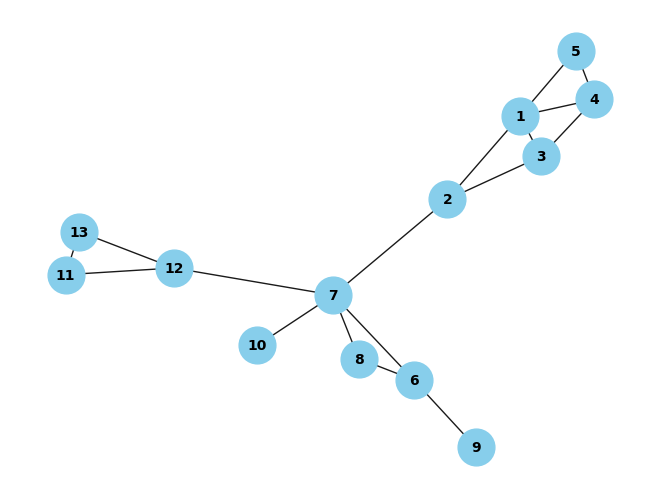

eigenvalues:
 [ 6.33320600e+00  5.02009550e+00  4.47101493e+00  3.86188722e+00
  3.53516066e+00  3.13826246e+00  1.91532249e+00 -7.44312663e-16
  1.83813342e-01  3.48195500e-01  7.71914030e-01  1.42112787e+00
  3.00000000e+00] 
eigenvectors:
 [[-1.35753948e-01  8.67324919e-01 -8.62376751e-02  1.48652029e-02
   9.22042486e-02  3.99726101e-02 -7.94107462e-02 -2.77350098e-01
   3.47136293e-01  7.82787336e-02  4.01543283e-02 -9.39824208e-03
  -5.70243739e-17]
 [ 3.11935876e-01 -2.53464349e-01 -3.17606059e-01  2.30538340e-02
   2.98527810e-01  4.81695911e-01 -5.27117964e-01 -2.77350098e-01
   2.05034604e-01  1.35048508e-02 -5.36548189e-02  1.26570558e-01
  -5.13951666e-16]
 [-6.96943182e-02 -1.89335283e-01  6.67086251e-01  7.54763748e-03
  -7.30180086e-02 -3.54724168e-01 -4.34395065e-01 -2.77350098e-01
   3.32557416e-01  7.08196318e-02  2.50053806e-02  3.48666234e-02
   1.66491754e-16]
 [ 5.61235908e-02 -2.31385216e-01 -5.77450099e-01 -4.44242492e-02
  -3.51655693e-01 -4.72623486e-01  1.353

In [ ]:
G = nx.Graph()
G.add_edges_from([
    [1, 2],
    [1, 3],
    [1, 4],
    [2, 3],
    [3, 4],
    [4, 5],
    [1, 5],
    [6, 7],
    [7, 8],
    [6, 8],
    [6, 9],
    [9, 6],
    [7, 10],
    [7, 2],
    [11, 12],
    [12, 13],
    [7, 12],
    [11, 13]])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10)
plt.show()

W = nx.adjacency_matrix(G) # Создаем матрицу смежности

D = np.diag(np.sum(np.array(W.todense()), axis=1))
L = D - W

eigenvalues, eigenvectors = np.linalg.eig(L)
print('eigenvalues:\n', eigenvalues, '\neigenvectors:\n', eigenvectors)

Как мы видим, здесь всего одно собственное число равно нулю, что говорит нам об одной компоненте связности в графе, однако есть и другие очень близкие к нулю собственные числа.

**Замечание!** Чем ближе собственное число к 0, тем явнее видно, как данные разделяются на кластеры.

[7 8]


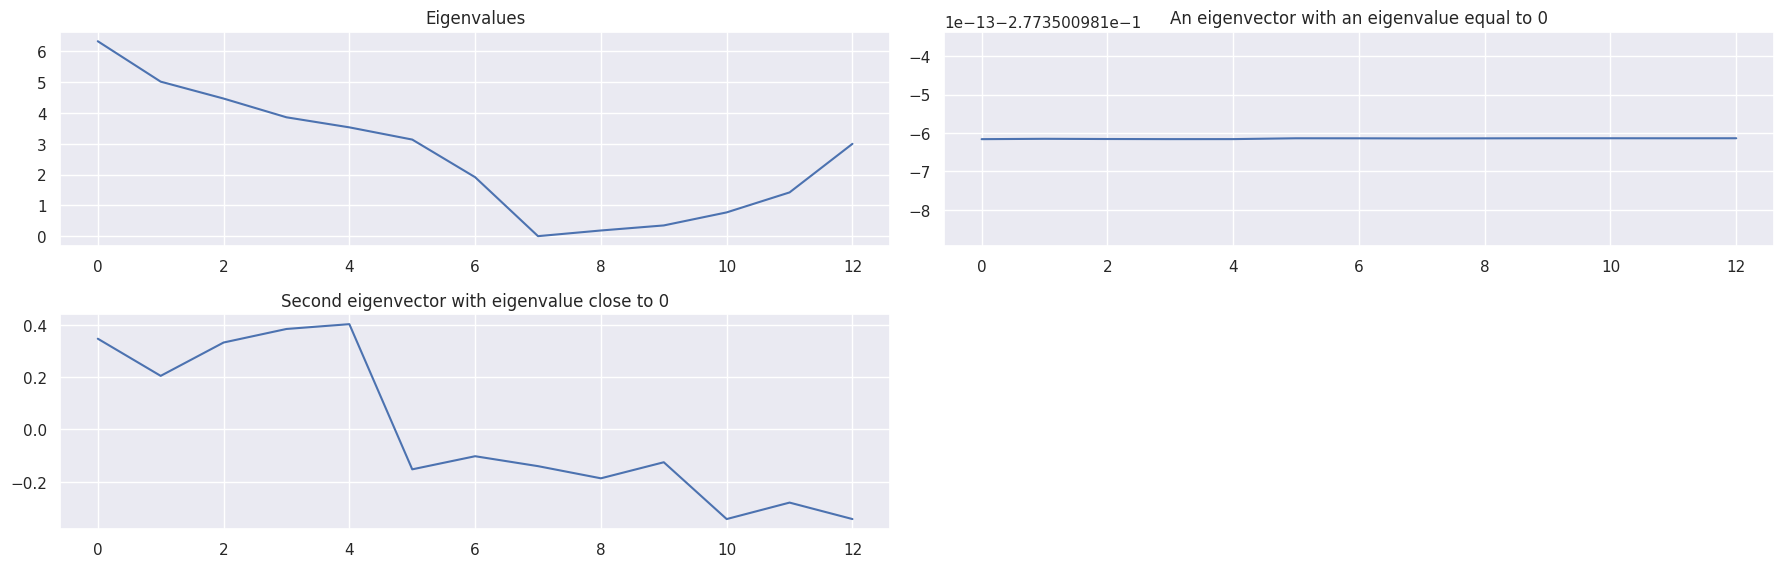

In [ ]:
fig = plt.figure(figsize=[18, 6])

ax1 = plt.subplot(221)
plt.plot(eigenvalues)
ax1.title.set_text('Eigenvalues')

i = np.where(eigenvalues < 0.3)[0]
print(i)

ax2 = plt.subplot(222)
plt.plot(eigenvectors[:, i[0]])
ax2.title.set_text('An eigenvector with an eigenvalue equal to 0')

ax3 = plt.subplot(223)
plt.plot(eigenvectors[:, i[1]])
ax3.title.set_text('Second eigenvector with eigenvalue close to 0')
fig.tight_layout()

Ничего себе! Второй наименьший вектор, исходя из графика показал нам аж 3 кластера! Проверим на kMeans.

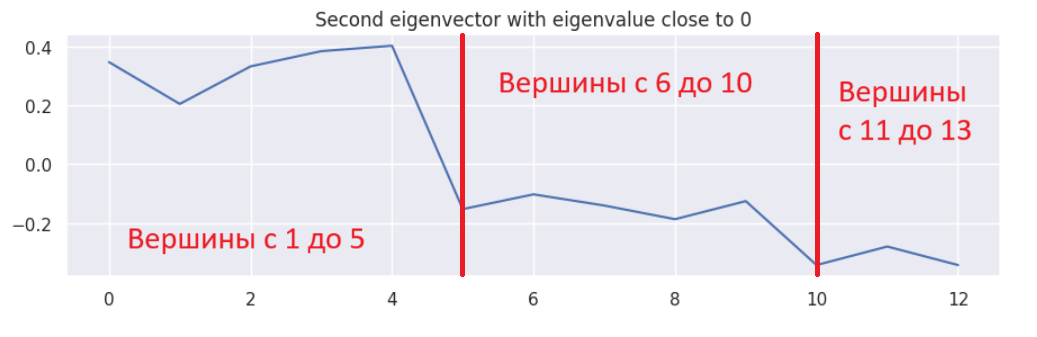

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


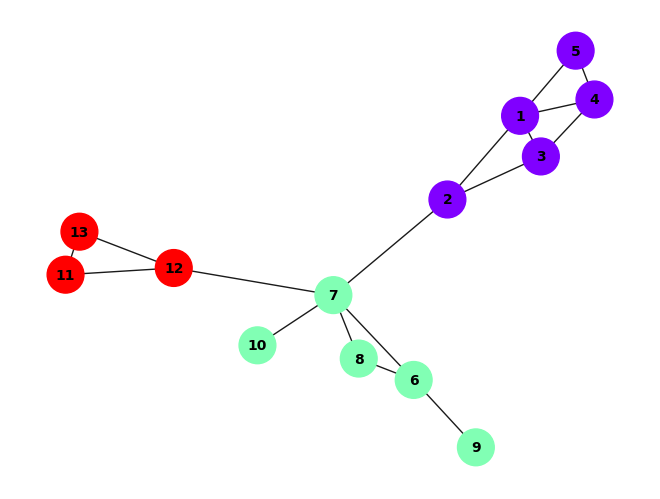

In [ ]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(eigenvectors[:, i[1]].reshape(-1, 1))

labels = kmeans.labels_

colors = [labels[i] for i in range(len(G.nodes))]
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color=colors, cmap=plt.cm.rainbow, font_color='black', font_size=10)
plt.show()

# Реализация на реальном наборе данных.

In [ ]:
import pandas as pd

data = pd.read_csv("Mall_Customers.csv")

data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Разделим выборку на две компоненты связности: мужчин и женщин.

In [ ]:
import numpy as np

W = nx.adjacency_matrix(G) # Создаем матрицу смежности

D = np.diag(np.sum(np.array(W.todense()), axis=1))
L = D - W

eigenvalues, eigenvectors = np.linalg.eig(L)
print('eigenvalues:\n', eigenvalues, '\neigenvectors:\n', eigenvectors)

eigenvalues:
 [ 6.61299836e+01  6.51298221e+01  6.41371894e+01  6.12851251e+01
  5.93109574e+01  5.82751806e+01  5.62813252e+01  5.50061860e+01
  5.48506328e+01  5.38410434e+01  5.35058586e+01  5.24825147e+01
  5.16414274e+01  5.11924840e+01  5.07140106e+01  5.04569471e+01
  5.01976200e+01  4.97024151e+01  4.90453533e+01  4.86342309e+01
  4.73603478e+01  4.78122645e+01  5.30000000e+01  4.68129541e+01
  4.59406010e+01  4.56820943e+01  4.19340284e+01  4.48690629e+01
  4.47450613e+01  4.44916661e+01  4.39430408e+01  4.25631875e+01
  4.32363042e+01  4.31854116e+01  4.08423237e+01  4.01170704e+01
  3.93723643e+01  3.85543698e+01  3.80727632e+01  3.84698554e+01
  3.36429956e+01  3.42492952e+01  3.49580407e+01  3.52538260e+01
  3.75304711e+01  3.72784939e+01  3.70919693e+01  3.64846868e+01
  3.61701005e+01  3.62865701e+01  3.69533600e+01  4.80000000e+01
  4.70000000e+01  4.50000000e+01  2.81961340e+01  2.91576460e+01
  2.97831495e+01  3.12088189e+01  3.16586087e+01  3.26023381e+01
  3.5528141

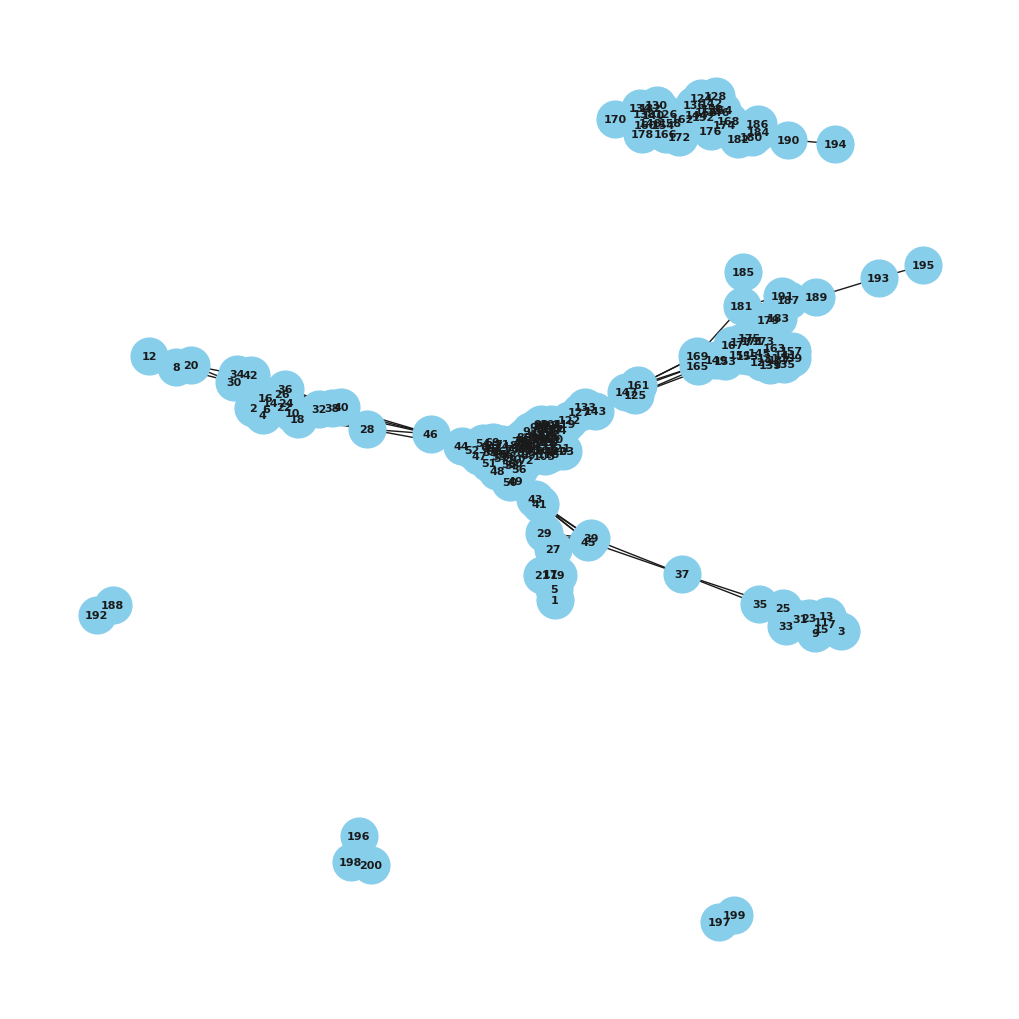

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for index, row in data.iterrows():
    G.add_node(row['CustomerID'], genre=row['Genre'], age=row['Age'], income=row['Annual Income (k$)'], spending_score=row['Spending Score (1-100)'])

for node1 in G.nodes():
    for node2 in G.nodes():
        if node1 != node2:
            #age_similarity = abs(G.nodes[node1]['age'] - G.nodes[node2]['age'])
            income_similarity = abs(G.nodes[node1]['income'] - G.nodes[node2]['income'])
            spending_similarity = abs(G.nodes[node1]['spending_score'] - G.nodes[node2]['spending_score'])
            if income_similarity < 12 and spending_similarity < 12:
                G.add_edge(node1, node2)

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8)

plt.show()

[107 136 148 197]


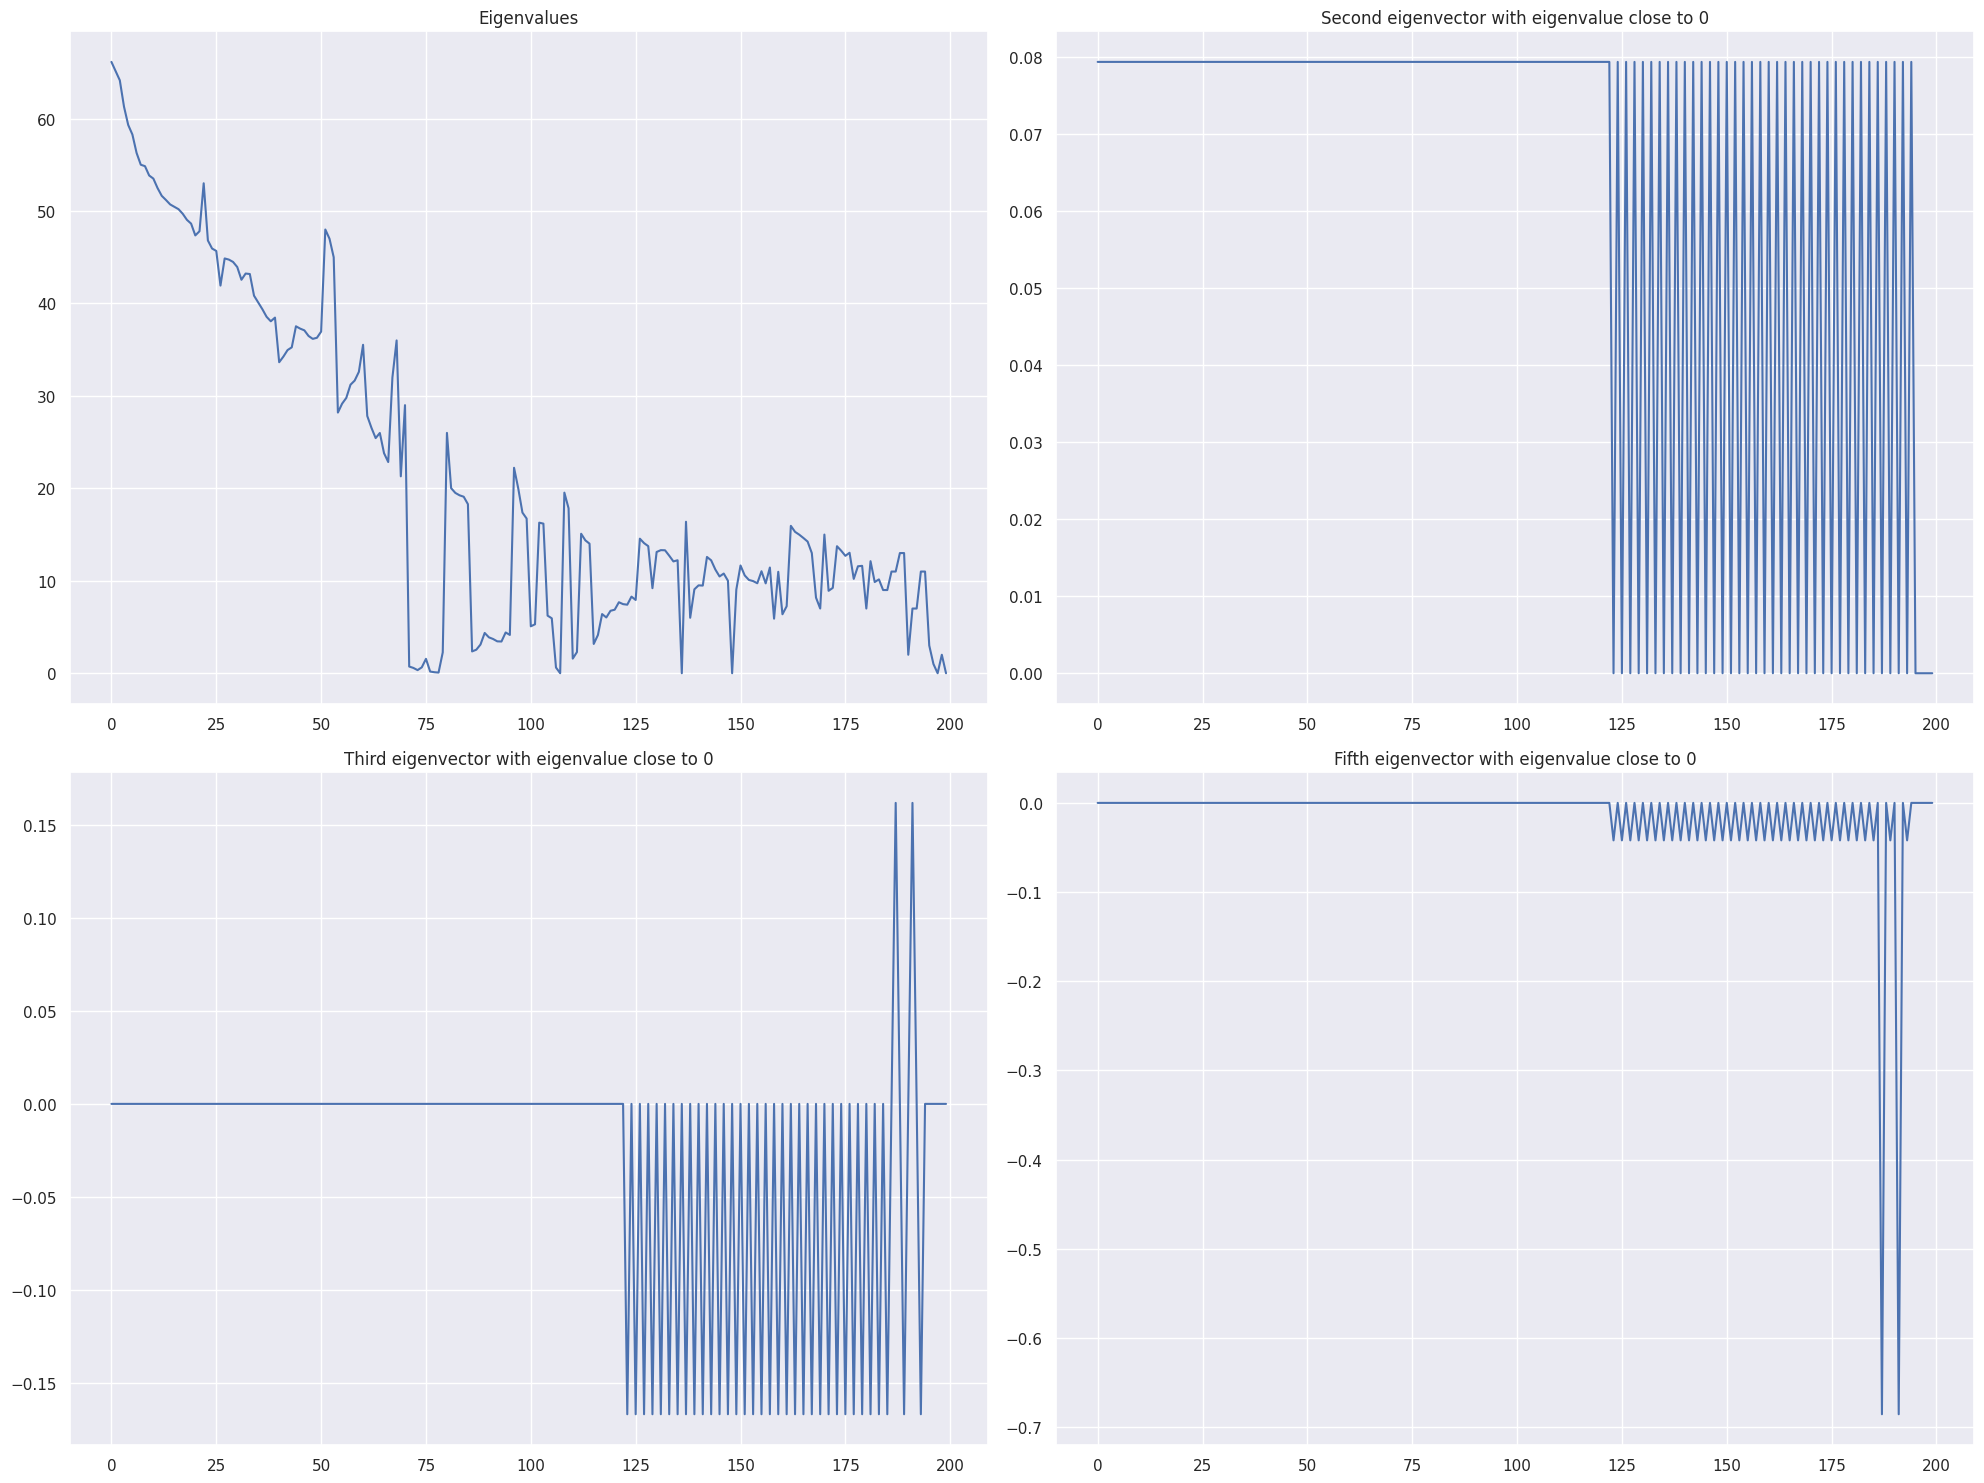

In [ ]:
fig = plt.figure(figsize=[20, 15])

ax1 = plt.subplot(221)
plt.plot(eigenvalues)
ax1.title.set_text('Eigenvalues')

i = np.where((np.abs(eigenvalues) < 0.00000001) & (np.abs(eigenvalues) > 0))[0]
print(i)

ax2 = plt.subplot(222)
plt.plot(eigenvectors[:, i[0]])
ax2.title.set_text('Second eigenvector with eigenvalue close to 0')

ax3 = plt.subplot(223)
plt.plot(eigenvectors[:, i[1]])
ax3.title.set_text('Third eigenvector with eigenvalue close to 0')

ax3 = plt.subplot(224)
plt.plot(eigenvectors[:, i[2]])
ax3.title.set_text('Fifth eigenvector with eigenvalue close to 0')

fig.tight_layout()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-39-ce003273e96b>:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans.fit(eigenvectors[:, i[1]].reshape(-1, 1))


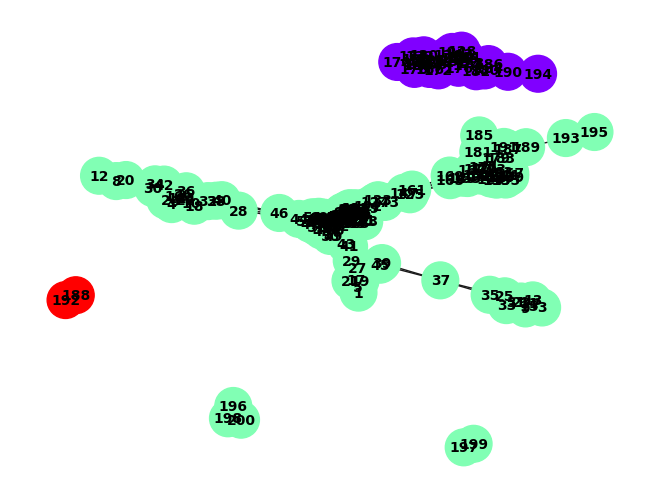

In [ ]:
from sklearn.cluster import SpectralClustering, KMeans

kmeans = KMeans(n_clusters = 4)
kmeans.fit(eigenvectors[:, i[1]].reshape(-1, 1))

labels = kmeans.labels_

colors = [labels[i] for i in range(len(G.nodes))]
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color=colors, cmap=plt.cm.rainbow, font_color='black', font_size=10)
plt.show()

In [ ]:
from sklearn.cluster import SpectralClustering

features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

spectral = SpectralClustering(n_clusters = 2, affinity = 'nearest_neighbors', random_state=42)
data['Cluster'] = spectral.fit_predict(features)

plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.title('Спектральная кластеризация в sklearn')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()